In [16]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# cargar los datos
df = pd.read_csv('spectra_pca_SNG.csv')

# separar las características (X) y la etiqueta (y)
X = df.drop('id', axis=1)
y = df['id']

# codificar la etiqueta (y)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)


In [17]:
df['id'].unique()

array([1, 2, 3], dtype=int64)

In [18]:
# crear el modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(3, activation='softmax')
])

# compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [19]:
# entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
319/319 [==============================] - 2s 5ms/step - loss: 0.3586 - accuracy: 0.9141 - val_loss: 0.2442 - val_accuracy: 0.9517
Epoch 2/50
319/319 [==============================] - 1s 3ms/step - loss: 0.2626 - accuracy: 0.9517 - val_loss: 0.2395 - val_accuracy: 0.9517
Epoch 3/50
319/319 [==============================] - 1s 3ms/step - loss: 0.2500 - accuracy: 0.9516 - val_loss: 0.2303 - val_accuracy: 0.9517
Epoch 4/50
319/319 [==============================] - 1s 3ms/step - loss: 0.2394 - accuracy: 0.9515 - val_loss: 0.2220 - val_accuracy: 0.9517
Epoch 5/50
319/319 [==============================] - 1s 3ms/step - loss: 0.2288 - accuracy: 0.9517 - val_loss: 0.2073 - val_accuracy: 0.9517
Epoch 6/50
319/319 [==============================] - 1s 3ms/step - loss: 0.2086 - accuracy: 0.9527 - val_loss: 0.1780 - val_accuracy: 0.9521
Epoch 7/50
319/319 [==============================] - 1s 3ms/step - loss: 0.1838 - accuracy: 0.9549 - val_loss: 0.1495 - val_accuracy: 0.9553
Epoch 

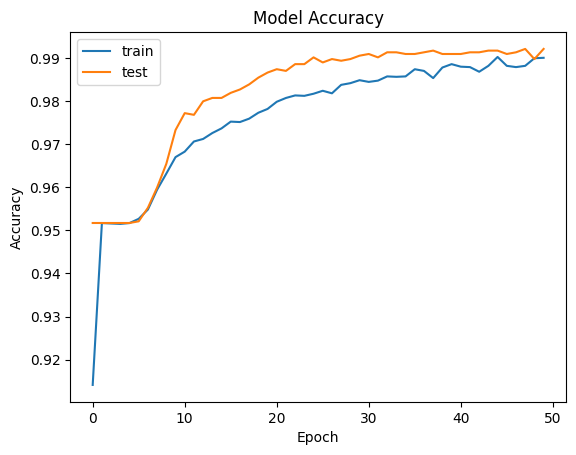

In [20]:
# graficar la precisión de entrenamiento y prueba
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


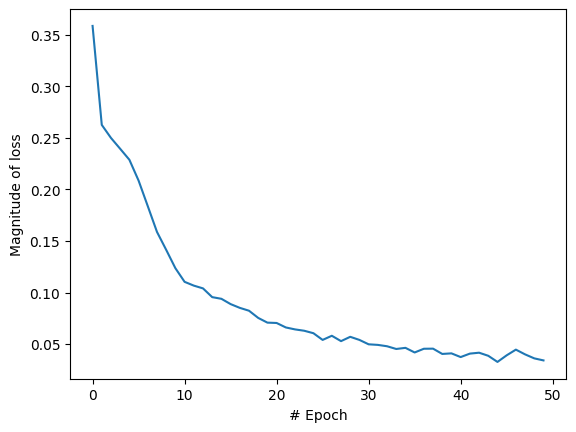

In [21]:
plt.xlabel("# Epoch")
plt.ylabel("Magnitude of loss")
plt.plot(history.history["loss"])

In [22]:
y=df['id']
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(y)
encoder = LabelEncoder()
df['codificado'] = encoder.fit_transform(df['id'])

nombres_etiquetas = encoder.classes_
nuevos_nombres = ['Symbiotics', 'Planetary Nebulae', 'Red Giants']
nombres_etiquetas_dict = {nombres_etiquetas[i]: nuevos_nombres[i] for i in range(len(nombres_etiquetas))}
df['nombres_etiquetas'] = df['id'].map(nombres_etiquetas_dict)

df_agrupado = df.groupby('nombres_etiquetas')['codificado'].mean()
print(df_agrupado)

nombres_etiquetas
Planetary Nebulae    1.0
Red Giants           2.0
Symbiotics           0.0
Name: codificado, dtype: float64


In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix

# predecir las probabilidades para los datos de prueba
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix(y_test, y_pred)
print(cm)


80/80 [==============================] - 0s 2ms/step
[[  24    3   11]
 [   2   80    3]
 [   0    1 2424]]


In [24]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9231    0.6316    0.7500        38
           1     0.9524    0.9412    0.9467        85
           2     0.9943    0.9996    0.9969      2425

    accuracy                         0.9922      2548
   macro avg     0.9566    0.8574    0.8979      2548
weighted avg     0.9918    0.9922    0.9916      2548



In [25]:
from sklearn.metrics import  accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9921507064364207


In [26]:
print("size of the splits")
print("X_train: ",  X_train.shape)
print("X_test: ",  X_test.shape)
print("y_test: ",  y_test.size)
print("y_pred: ",  y_pred.size)

size of the splits
X_train:  (10189, 30)
X_test:  (2548, 30)
y_test:  2548
y_pred:  2548


In [27]:
model.save('PCA_RNA_SNG.h5')